In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Opti-ML') #to access other files
import os
# Useful starting lines
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms, utils
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision.transforms import ToTensor

from optimizer import initialize_model

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
statedic_sgd=torch.load("/content/drive/MyDrive/Opti-ML/model_weights/model_sgd.pt",map_location=torch.device('cpu'))
model_sgd,inputsize = initialize_model(use_pretrained=False)
model_sgd.load_state_dict(statedic_sgd)

statedic_ada=torch.load("/content/drive/MyDrive/Opti-ML/model_weights/model_adahessian.pt",map_location=torch.device('cpu'))
model_ada,inputsize=initialize_model(use_pretrained=False)
model_ada.load_state_dict(statedic_ada)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [15]:
for name, layer in model_sgd.named_modules():
  #if isinstance(layer, nn.Conv2d):
    #print(name, layer)
  if name=='layer3.0.conv1':
    layer1 = layer
  #if name=='layer4.0.conv1':
    #layer2 = layer
for name, layer in model_ada.named_modules():
  #if isinstance(layer, nn.Conv2d):
    #print(name, layer)
  if name=='layer3.0.conv1':
    layer2 = layer
print(layer1)
print(layer2)

Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)


In [16]:
layer1.weight

Parameter containing:
tensor([[[[-0.0685,  0.0401,  0.0352],
          [ 0.0106, -0.0398,  0.0892],
          [ 0.0017, -0.0759, -0.0361]],

         [[ 0.0058,  0.0459, -0.0603],
          [-0.0268,  0.0056, -0.0019],
          [ 0.0083, -0.0071, -0.0159]],

         [[ 0.0011, -0.0227, -0.0254],
          [-0.0137,  0.0123,  0.0920],
          [-0.0252, -0.0330, -0.0443]],

         ...,

         [[-0.0384, -0.0292,  0.0072],
          [ 0.0018,  0.0873, -0.0133],
          [-0.0035,  0.0284,  0.0048]],

         [[ 0.0210, -0.0345,  0.0140],
          [-0.0287,  0.0006, -0.0607],
          [ 0.0095, -0.0095, -0.0561]],

         [[-0.0118,  0.0051,  0.0211],
          [-0.0075, -0.0120,  0.0265],
          [ 0.0109, -0.0032, -0.0355]]],


        [[[ 0.0067, -0.0110,  0.0577],
          [ 0.0114, -0.0202, -0.0227],
          [-0.0674,  0.0175, -0.0428]],

         [[-0.0121, -0.0099,  0.0017],
          [-0.0277,  0.0172,  0.0184],
          [-0.0415,  0.0613,  0.0201]],

         

In [27]:
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1):
  n,c,w,h = tensor.shape

  if allkernels: tensor = tensor.view(n*c, -1, w, h)
  elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

  rows = np.min((tensor.shape[0] // nrow + 1, 64))
  grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
  grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
  plt.figure( figsize=(nrow,rows) )
  plt.imshow(grid.numpy().transpose((1, 2, 0)))

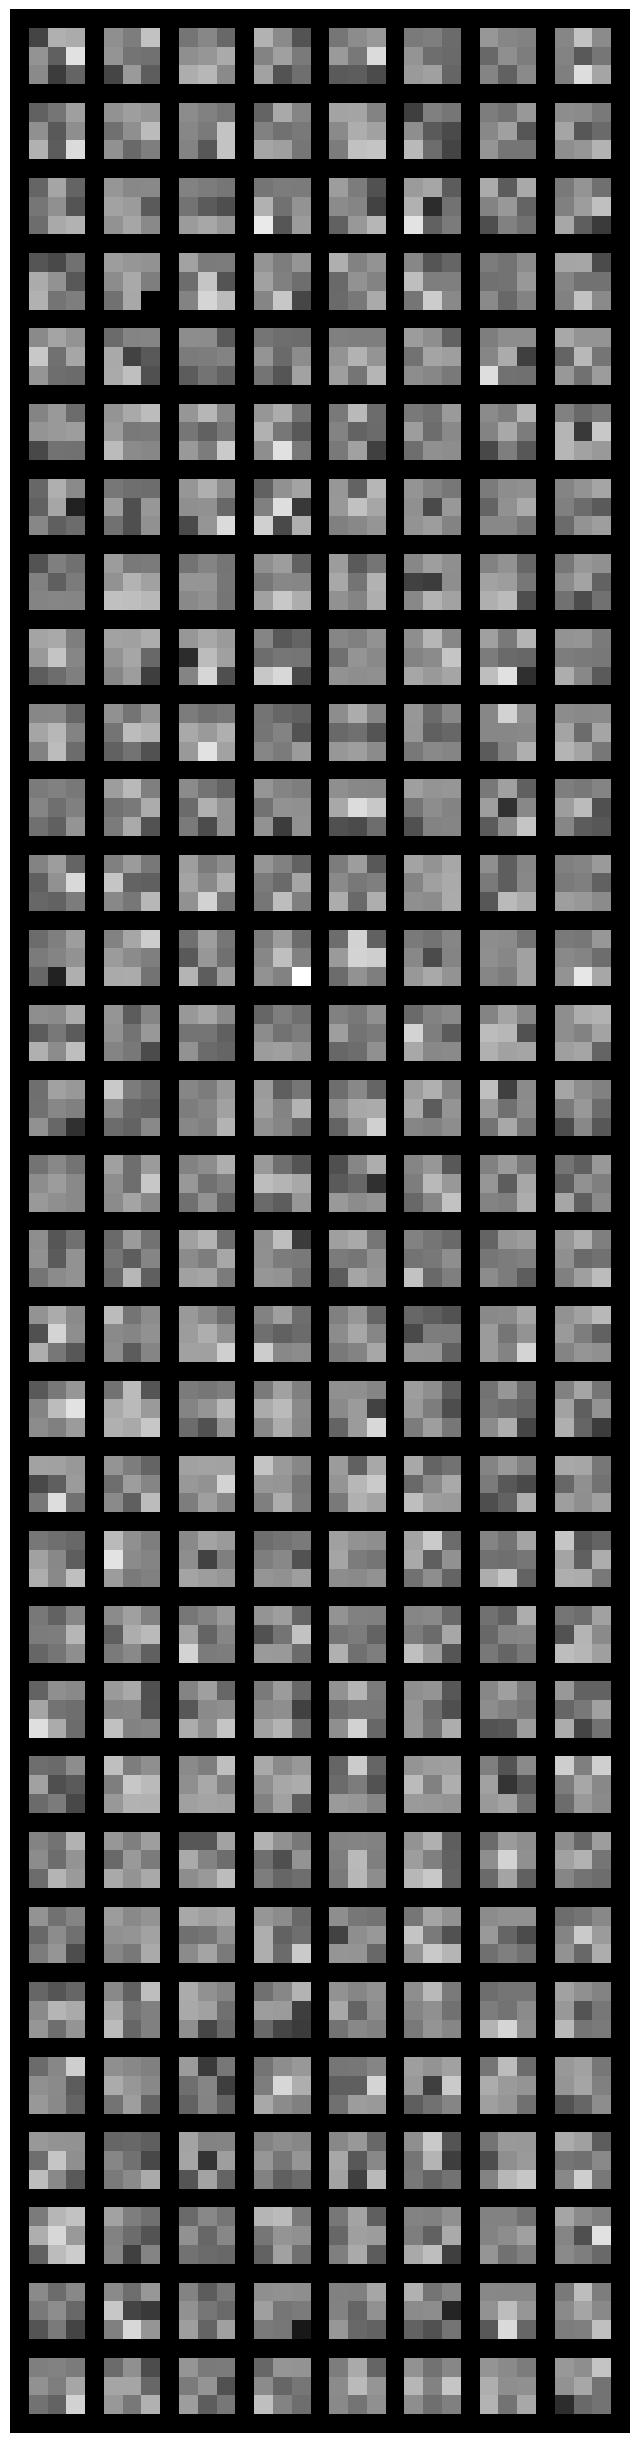

In [28]:
filter = layer1.weight.data.clone()
visTensor(filter, ch=0, allkernels=False)
plt.axis('off')
plt.ioff()
plt.show()

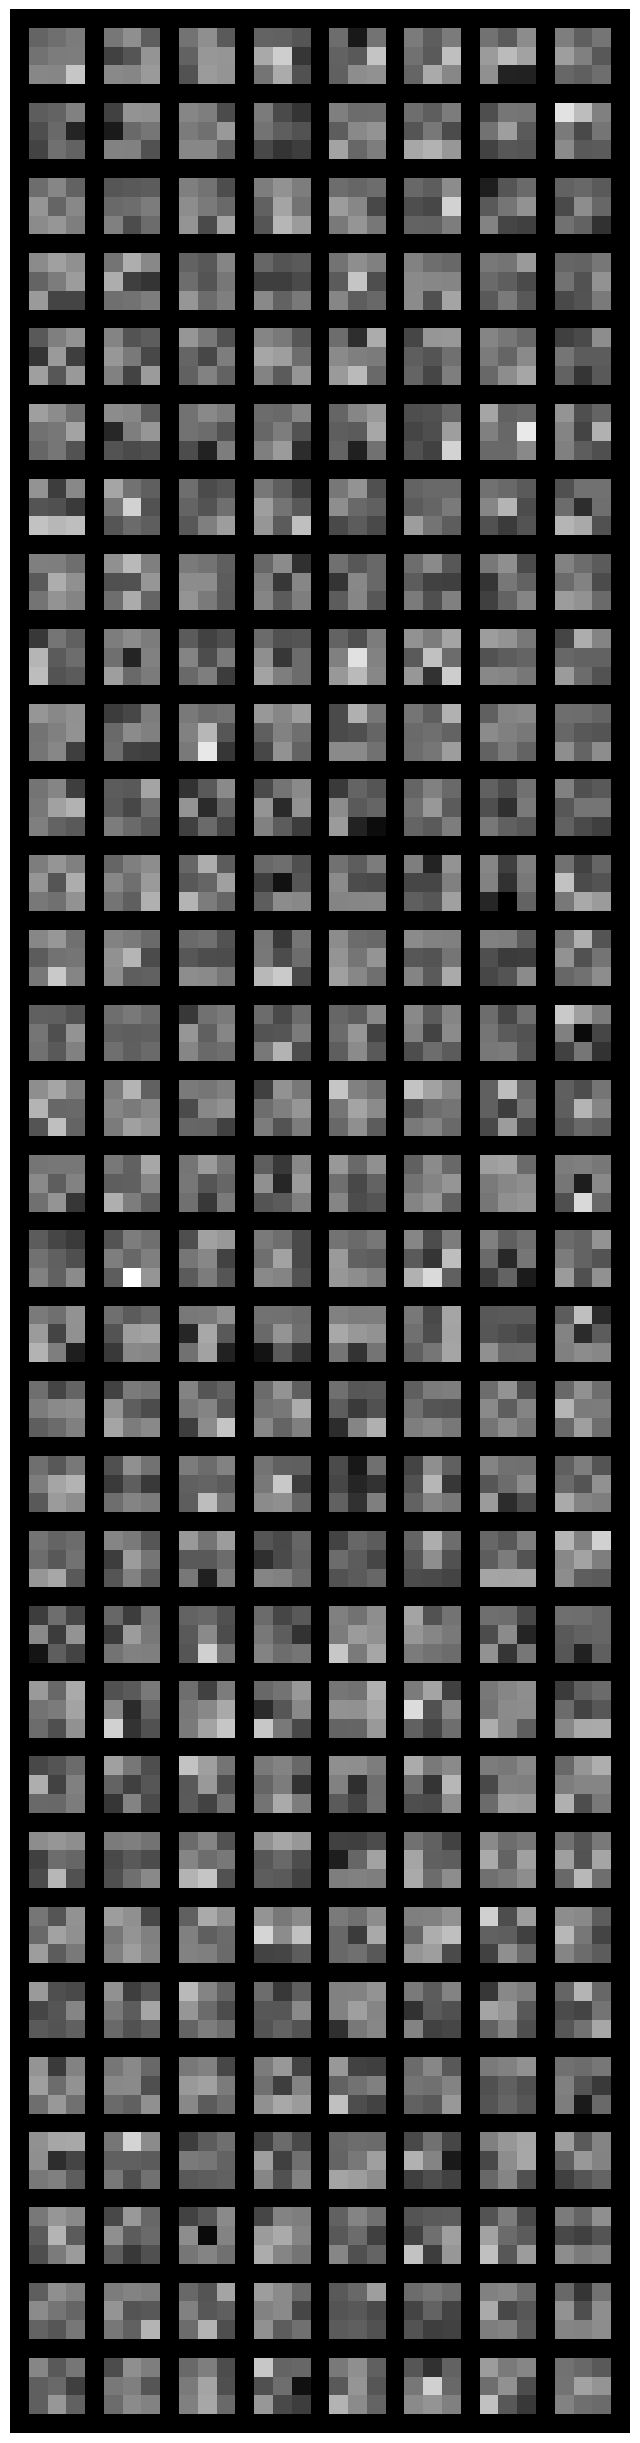

In [18]:
filter = layer2.weight.data.clone()
visTensor(filter, ch=0, allkernels=False)
plt.axis('off')
plt.ioff()
plt.show()